In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
train = pd.read_csv("train/train.csv")
train_h_log = pd.read_csv("train/historical_user_logs.csv")

In [3]:
test = pd.read_csv("test/test.csv")

In [4]:
len(test)

128858

In [ ]:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

In [6]:
data.columns

Index(['DateTime', 'age_level', 'campaign_id', 'city_development_index',
       'gender', 'is_click', 'product', 'product_category_1',
       'product_category_2', 'session_id', 'source', 'user_depth',
       'user_group_id', 'user_id', 'var_1', 'webpage_id'],
      dtype='object')

In [7]:
train.shape,test.shape

((463291, 16), (128858, 15))

In [ ]:
train_h_log['product'].value_counts()

In [ ]:
data['product'].value_counts()

In [ ]:
for col in data.columns:
    print("col name :",col)
    print(data[col].value_counts())

In [11]:
data.apply(lambda x: sum(x.isnull()))

DateTime                       0
age_level                  23927
campaign_id                    0
city_development_index    159738
gender                     23927
is_click                  128858
product                        0
product_category_1             0
product_category_2        442025
session_id                     0
source                         0
user_depth                 23927
user_group_id              23927
user_id                        0
var_1                          0
webpage_id                     0
dtype: int64

In [12]:
data['age_level'].fillna(data['age_level'].median(),inplace=True)

In [13]:
data['city_development_index'].fillna(data['city_development_index'].median(),inplace=True)
data['gender'] = le.fit_transform(data['gender'].astype(str))

In [14]:
data['gender'].fillna(data['gender'].median(),inplace=True)

In [15]:
data.drop('product_category_2',inplace=True,axis=1)

In [16]:
# data = data[np.isfinite(data['user_id'])]
# data = data[np.isfinite(data['user_depth'])]

data['user_id'] = data['user_id'].fillna(0)
data['user_depth'] = data['user_depth'].fillna(0)
data['user_group_id'].fillna(data['user_group_id'].median(),inplace=True)

In [17]:
data.apply(lambda x: sum(x.isnull()))

DateTime                       0
age_level                      0
campaign_id                    0
city_development_index         0
gender                         0
is_click                  128858
product                        0
product_category_1             0
session_id                     0
source                         0
user_depth                     0
user_group_id                  0
user_id                        0
var_1                          0
webpage_id                     0
dtype: int64

In [18]:
data.head(10)

,DateTime,age_level,campaign_id,city_development_index,gender,is_click,product,product_category_1,session_id,source,user_depth,user_group_id,user_id,var_1,webpage_id
0,2017-07-02 00:00,4.0,359520,3.0,0,0.0,C,4,140690,train,3.0,10.0,858557,0,13787
1,2017-07-02 00:00,2.0,105960,2.0,0,0.0,C,5,333291,train,2.0,8.0,243253,0,11085
2,2017-07-02 00:00,2.0,359520,2.0,0,0.0,C,4,129781,train,2.0,8.0,243253,0,13787
3,2017-07-02 00:00,3.0,359520,2.0,1,0.0,I,3,464848,train,3.0,3.0,1097446,1,13787
4,2017-07-02 00:01,2.0,405490,2.0,1,0.0,C,3,90569,train,3.0,2.0,663656,1,60305
5,2017-07-02 00:01,1.0,359520,2.0,1,0.0,I,2,151475,train,3.0,1.0,509591,0,13787
6,2017-07-02 00:01,3.0,405490,4.0,0,0.0,F,3,17583,train,3.0,9.0,1091463,0,60305
7,2017-07-02 00:01,4.0,360936,4.0,1,0.0,C,3,461128,train,3.0,4.0,469098,0,13787
8,2017-07-02 00:02,3.0,105960,2.0,2,0.0,H,5,390699,train,0.0,3.0,611906,0,11085
9,2017-07-02 00:02,4.0,360936,4.0,1,0.0,B,2,353607,train,3.0,4.0,418107,0,13787


In [19]:
var_to_encode = ['product','gender','campaign_id','product_category_1','webpage_id']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['DateTime', 'age_level', 'city_development_index', 'is_click',
       'session_id', 'source', 'user_depth', 'user_group_id', 'user_id',
       'var_1', 'product_0', 'product_1', 'product_2', 'product_3',
       'product_4', 'product_5', 'product_6', 'product_7', 'product_8',
       'product_9', 'gender_0', 'gender_1', 'gender_2', 'campaign_id_0',
       'campaign_id_1', 'campaign_id_2', 'campaign_id_3', 'campaign_id_4',
       'campaign_id_5', 'campaign_id_6', 'campaign_id_7', 'campaign_id_8',
       'campaign_id_9', 'product_category_1_0', 'product_category_1_1',
       'product_category_1_2', 'product_category_1_3', 'product_category_1_4',
       'webpage_id_0', 'webpage_id_1', 'webpage_id_2', 'webpage_id_3',
       'webpage_id_4', 'webpage_id_5', 'webpage_id_6', 'webpage_id_7',
       'webpage_id_8'],
      dtype='object')

In [20]:
train_h_log.head(10)

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view
5,2017-05-29 07:10,499679,G,view
6,2017-05-29 07:10,499679,G,view
7,2017-05-29 07:10,499679,G,view
8,2017-05-29 07:10,499679,G,view
9,2017-05-29 07:11,499679,G,view


In [21]:
df_train_h_log = train_h_log

##### Process train hlog

In [22]:
var_to_encode = ['product','action']
for col in var_to_encode:
    df_train_h_log[col] = le.fit_transform(df_train_h_log[col])

In [23]:
df_train_h_log = pd.get_dummies(df_train_h_log, columns=var_to_encode)
df_train_h_log.columns

Index(['DateTime', 'user_id', 'product_0', 'product_1', 'product_2',
       'product_3', 'product_4', 'product_5', 'product_6', 'product_7',
       'product_8', 'product_9', 'action_0', 'action_1'],
      dtype='object')

In [24]:
df_train_h_log = df_train_h_log.groupby('user_id').agg('sum')
df_train_h_log.head(10)

,product_0,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,action_0,action_1
user_id,,,,,,,,,,,,
4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,7.0
19,14.0,21.0,1.0,53.0,8.0,36.0,19.0,16.0,0.0,0.0,5.0,163.0
25,8.0,0.0,0.0,0.0,1.0,2.0,42.0,10.0,4.0,0.0,0.0,67.0
26,0.0,28.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,1.0,51.0
30,2.0,8.0,14.0,2.0,6.0,0.0,1.0,32.0,7.0,0.0,2.0,70.0
33,11.0,13.0,29.0,17.0,0.0,2.0,9.0,48.0,16.0,0.0,6.0,139.0
37,22.0,15.0,6.0,21.0,0.0,15.0,0.0,24.0,21.0,0.0,0.0,124.0
46,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
51,5.0,14.0,7.0,16.0,3.0,0.0,8.0,6.0,4.0,0.0,0.0,63.0


In [25]:
data.shape

(592149, 47)

In [26]:
df_train = pd.merge(data,df_train_h_log,how="left",on='user_id')

In [27]:
df_train.shape

(592149, 59)

In [28]:
df_train.columns

Index(['DateTime', 'age_level', 'city_development_index', 'is_click',
       'session_id', 'source', 'user_depth', 'user_group_id', 'user_id',
       'var_1', 'product_0_x', 'product_1_x', 'product_2_x', 'product_3_x',
       'product_4_x', 'product_5_x', 'product_6_x', 'product_7_x',
       'product_8_x', 'product_9_x', 'gender_0', 'gender_1', 'gender_2',
       'campaign_id_0', 'campaign_id_1', 'campaign_id_2', 'campaign_id_3',
       'campaign_id_4', 'campaign_id_5', 'campaign_id_6', 'campaign_id_7',
       'campaign_id_8', 'campaign_id_9', 'product_category_1_0',
       'product_category_1_1', 'product_category_1_2', 'product_category_1_3',
       'product_category_1_4', 'webpage_id_0', 'webpage_id_1', 'webpage_id_2',
       'webpage_id_3', 'webpage_id_4', 'webpage_id_5', 'webpage_id_6',
       'webpage_id_7', 'webpage_id_8', 'product_0_y', 'product_1_y',
       'product_2_y', 'product_3_y', 'product_4_y', 'product_5_y',
       'product_6_y', 'product_7_y', 'product_8_y', 'product_

In [29]:
# df_train['year'] = [d.year() for d in df_train['DateTime']]
df_train['year'] = pd.DatetimeIndex(df_train['DateTime']).year
df_train['month'] = pd.DatetimeIndex(df_train['DateTime']).month
df_train['day'] = pd.DatetimeIndex(df_train['DateTime']).day

In [30]:
# var_to_encode = ['year','month','day']
# for col in var_to_encode:
#     df_train[col] = le.fit_transform(df_train[col])

In [31]:
df_train.drop('DateTime',inplace=True,axis=1)

In [32]:
df_train.head(10)

,age_level,city_development_index,is_click,session_id,source,user_depth,user_group_id,user_id,var_1,product_0_x,...,product_5_y,product_6_y,product_7_y,product_8_y,product_9_y,action_0,action_1,year,month,day
0,4.0,3.0,0.0,140690,train,3.0,10.0,858557,0,0,...,40.0,10.0,25.0,6.0,0.0,0.0,627.0,2017,7,2
1,2.0,2.0,0.0,333291,train,2.0,8.0,243253,0,0,...,3.0,1.0,35.0,0.0,0.0,0.0,62.0,2017,7,2
2,2.0,2.0,0.0,129781,train,2.0,8.0,243253,0,0,...,3.0,1.0,35.0,0.0,0.0,0.0,62.0,2017,7,2
3,3.0,2.0,0.0,464848,train,3.0,3.0,1097446,1,0,...,0.0,5.0,15.0,9.0,0.0,2.0,41.0,2017,7,2
4,2.0,2.0,0.0,90569,train,3.0,2.0,663656,1,0,...,3.0,0.0,15.0,2.0,0.0,3.0,57.0,2017,7,2
5,1.0,2.0,0.0,151475,train,3.0,1.0,509591,0,0,...,1.0,41.0,92.0,23.0,0.0,11.0,234.0,2017,7,2
6,3.0,4.0,0.0,17583,train,3.0,9.0,1091463,0,0,...,22.0,37.0,504.0,40.0,4.0,7.0,776.0,2017,7,2
7,4.0,4.0,0.0,461128,train,3.0,4.0,469098,0,0,...,13.0,0.0,29.0,1.0,0.0,0.0,65.0,2017,7,2
8,3.0,2.0,0.0,390699,train,0.0,3.0,611906,0,0,...,1.0,0.0,12.0,3.0,0.0,6.0,54.0,2017,7,2
9,4.0,4.0,0.0,353607,train,3.0,4.0,418107,0,0,...,13.0,12.0,15.0,5.0,0.0,9.0,59.0,2017,7,2


In [33]:
df_train.dtypes

age_level                 float64
city_development_index    float64
is_click                  float64
session_id                  int64
source                     object
user_depth                float64
user_group_id             float64
user_id                     int64
var_1                       int64
product_0_x                 uint8
product_1_x                 uint8
product_2_x                 uint8
product_3_x                 uint8
product_4_x                 uint8
product_5_x                 uint8
product_6_x                 uint8
product_7_x                 uint8
product_8_x                 uint8
product_9_x                 uint8
gender_0                    uint8
gender_1                    uint8
gender_2                    uint8
campaign_id_0               uint8
campaign_id_1               uint8
campaign_id_2               uint8
campaign_id_3               uint8
campaign_id_4               uint8
campaign_id_5               uint8
campaign_id_6               uint8
campaign_id_7 

In [34]:
columns = ['product_0_y','product_1_y','product_2_y','product_3_y','product_4_y','product_5_y','product_6_y','product_7_y','product_8_y','product_9_y','action_0','action_1']
for col in columns:
    df_train[col].fillna(df_train[col].median(),inplace=True)

###### Seperating data

In [35]:
train = df_train.loc[df_train['source']=='train']
test = df_train.loc[df_train['source']=='test']

In [ ]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','is_click'],axis=1,inplace=True)

In [261]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [37]:
train.head()

,age_level,city_development_index,is_click,session_id,user_depth,user_group_id,user_id,var_1,product_0_x,product_1_x,...,product_5_y,product_6_y,product_7_y,product_8_y,product_9_y,action_0,action_1,year,month,day
0,4.0,3.0,0.0,140690,3.0,10.0,858557,0,0,0,...,40.0,10.0,25.0,6.0,0.0,0.0,627.0,2017,7,2
1,2.0,2.0,0.0,333291,2.0,8.0,243253,0,0,0,...,3.0,1.0,35.0,0.0,0.0,0.0,62.0,2017,7,2
2,2.0,2.0,0.0,129781,2.0,8.0,243253,0,0,0,...,3.0,1.0,35.0,0.0,0.0,0.0,62.0,2017,7,2
3,3.0,2.0,0.0,464848,3.0,3.0,1097446,1,0,0,...,0.0,5.0,15.0,9.0,0.0,2.0,41.0,2017,7,2
4,2.0,2.0,0.0,90569,3.0,2.0,663656,1,0,0,...,3.0,0.0,15.0,2.0,0.0,3.0,57.0,2017,7,2


##### gbm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 5

In [39]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    model = alg.fit(dtrain[predictors], dtrain['is_click'])
        
    #Predict training set:
    dtrain_predictions = model.predict(dtrain[predictors])
    dtrain_predprob = model.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(model, dtrain[predictors], dtrain['is_click'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['is_click'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['is_click'], dtrain_predprob))
    
    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [40]:
target = 'is_click'
IDcol = 'session_id'

In [41]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
# modelfit(gbm0, train, test, predictors)

In [42]:
model = gbm0.fit(train[predictors], train[target])
test_predictions = model.predict(test[predictors])
#Print Feature Importance:


Text(0,0.5,'Feature Importance Score')

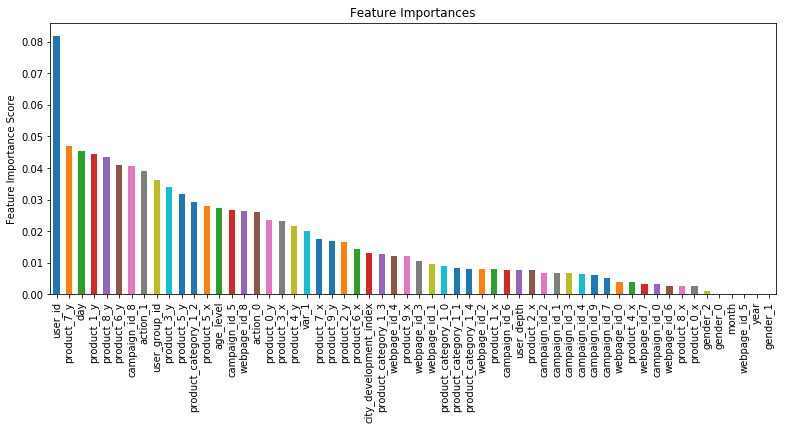

In [43]:

feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [44]:
predprob = model.predict_proba(test[predictors])[:,1]

In [45]:
predprob

array([0.08606939, 0.06148405, 0.05322171, ..., 0.05002304, 0.06339646,
       0.05825103])

In [46]:
len(predprob)

128858

In [47]:
len(test['session_id'])

128858

In [48]:
predd = pd.DataFrame(predprob)

In [49]:
last_df = test['session_id'].reset_index()

In [50]:
last_df= last_df.drop(['index'], axis=1)

In [51]:
sub_file = pd.concat([last_df,predd], axis=1,ignore_index=False ).rename(columns = {0:'is_click'})

In [52]:
sub_file.head()

,session_id,is_click
0,411705,0.086069
1,208263,0.061484
2,239450,0.053222
3,547761,0.044287
4,574275,0.073061


In [53]:
sub_file.to_csv('submission2.csv',index=False)